In [ ]:
!pip install gprofiler-official pandas openpyxl
!pip install gprofiler-official pandas

# 🧬 Keyword Enrichment & Pathway Analysis using g:Profiler

This script performs functional enrichment analysis using [g:Profiler](https://biit.cs.ut.ee/gprofiler/gost) on a list of gene identifiers and generates summary reports, matched gene lists, and annotations. It is useful for identifying enriched biological terms, pathways, and gene ontology (GO) categories from custom gene sets.

---

## 📌 Features

- Load gene IDs from a `.txt` file
- Perform enrichment analysis with `gprofiler`
- Summarize enrichment terms with p-values, enrichment ratios, and significance
- Extract matched genes for each term
- Output optional annotation information (e.g., hierarchy or pathway metadata)
- Save all outputs as formatted Excel files

---

## 📁 Input

- **Gene ID File** (`.txt`): A plain text file with one gene ID per line  
  *(e.g., ENSBTAG00000000001)*

---

## ⚙️ How It Works

### 1. Load Gene IDs

```python
gene_ids = load_gene_ids("Top 10 genes.txt")


In [1]:
from gprofiler import GProfiler 
import pandas as pd
from pathlib import Path

def load_gene_ids(file_path):
    """
    Load gene IDs from a txt file.
    :param file_path: Path to the gene ID file
    :return: List of gene IDs
    """
    with open(file_path, 'r') as file:
        gene_ids = [line.strip() for line in file if line.strip()]
    return gene_ids

def perform_enrichment_analysis(gene_ids, species="btaurus"):
    """
    Perform gene enrichment analysis.
    :param gene_ids: List of gene IDs
    :param species: Species (default 'btaurus' for cattle)
    :return: DataFrame with enrichment analysis results
    """
    gp = GProfiler(return_dataframe=True)
    results = gp.profile(organism=species, query=gene_ids)
    return results

def summarize_enrichment_results(enrichment_results):
    """
    Extract and summarize key information from the enrichment analysis, adding enrichment ratio.
    :param enrichment_results: DataFrame of enrichment analysis results
    :return: DataFrame with key information and enrichment ratio
    """
    # Define the required columns and the actual columns present
    available_columns = enrichment_results.columns
    required_columns = [
        "source", "native", "name", "p_value", "p_value_adjusted",
        "intersection_size", "query_size", "effective_domain_size"
    ]
    selected_columns = [col for col in required_columns if col in available_columns]

    # Extract the available columns
    summary = enrichment_results[selected_columns]

    # Calculate enrichment ratio
    if "intersection_size" in summary.columns and "effective_domain_size" in summary.columns:
        summary["Enrichment Ratio"] = (
            summary["intersection_size"] / summary["query_size"]
        ) / (summary["effective_domain_size"] / summary["effective_domain_size"].sum())

    # Rename columns
    column_mapping = {
        "source": "Database Source",
        "native": "Term ID",
        "name": "Term Name",
        "p_value": "P-Value",
        "p_value_adjusted": "Adjusted P-Value",
        "intersection_size": "Mapped Genes",
        "query_size": "Input Genes",
        "effective_domain_size": "Background Genes"
    }
    summary.rename(columns=column_mapping, inplace=True)
    return summary

def extract_matched_genes(enrichment_results):
    """
    Extract the list of matched genes for each enriched term.
    :param enrichment_results: DataFrame of enrichment analysis results
    :return: DataFrame containing the term names and matched genes
    """
    matched_genes_data = []
    for _, row in enrichment_results.iterrows():
        term_name = row["name"]
        matched_genes = row["query"].split(",") if isinstance(row["query"], str) else []
        matched_genes_data.append({"Term Name": term_name, "Matched Genes": ", ".join(matched_genes)})

    return pd.DataFrame(matched_genes_data)

def extract_annotations(enrichment_results):
    """
    Extract additional annotation information, including hierarchy and pathway maps.
    :param enrichment_results: DataFrame of enrichment analysis results
    :return: DataFrame with additional annotations
    """
    annotation_data = []
    for _, row in enrichment_results.iterrows():
        term_name = row["name"]
        hierarchy = row["parents"] if "parents" in enrichment_results.columns else "N/A"
        description = row["description"] if "description" in enrichment_results.columns else "N/A"
        annotation_data.append({"Term Name": term_name, "Hierarchy": hierarchy, "Description": description})

    return pd.DataFrame(annotation_data)

def save_to_excel(dataframe, output_path):
    """
    Save the DataFrame to an Excel file.
    :param dataframe: DataFrame to be saved
    :param output_path: Path to the output file
    """
    dataframe.to_excel(output_path, index=False)
    print(f"Results saved as: {output_path}")

# Main program
if __name__ == "__main__":
    # Input file path
    input_file = Path("..Top 10 genes.txt")  # Replace with your path
    output_summary_file = Path("..Gene_enrichment_summary.xlsx")
    output_genes_file = Path("..Matched_genes_list.xlsx")
    output_annotations_file = Path("..Annotations.xlsx")

    # Load gene IDs
    gene_ids = load_gene_ids(input_file)
    if not gene_ids:
        print("The gene ID file is empty or invalid. Please check the input file.")
    else:
        # Perform enrichment analysis
        enrichment_results = perform_enrichment_analysis(gene_ids)

        if enrichment_results.empty:
            print("No enrichment analysis results generated.")
        else:
            # Extract and save the enrichment summary
            summary_table = summarize_enrichment_results(enrichment_results)
            save_to_excel(summary_table, output_summary_file)

            # Extract and save the matched genes list
            matched_genes_table = extract_matched_genes(enrichment_results)
            save_to_excel(matched_genes_table, output_genes_file)

            # Extract and save additional annotations
            annotations_table = extract_annotations(enrichment_results)
            save_to_excel(annotations_table, output_annotations_file)


C:\Users\44792\AppData\Local\Temp\ipykernel_30760\1884631992.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary["Enrichment Ratio"] = (
C:\Users\44792\AppData\Local\Temp\ipykernel_30760\1884631992.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary.rename(columns=column_mapping, inplace=True)


Results saved as: C:\Users\44792\Downloads\Gene_enrichment_summary.xlsx
Results saved as: C:\Users\44792\Downloads\Matched_genes_list.xlsx
Results saved as: C:\Users\44792\Downloads\Annotations.xlsx


# 🧬 Visualization Toolkit for Enrichment Analysis Results

This script provides a set of visualization tools for exploring gene enrichment results. It supports **bar plots**, **bubble plots**, and **network graphs** based on significance, enrichment ratios, and term connectivity.

---

## 📌 Features

- 📊 Bar plot with color-coded P-value ranges  
- 🫧 Bubble plot with log-scaled enrichment ratios and gene counts  
- 🔗 Network graph of enriched terms with customizable connections

---

## 📁 Input

- A gene enrichment summary Excel file (e.g., `gene_enrichment_summary.xlsx`)  
  Required columns:
  - `Term Name`
  - `P-Value`
  - `Mapped Genes`
  - `Input Genes`
  - `Background Genes`

---

## 📊 Visualizations

### 1. Bar Plot: P-value Highlighting

```python
barplot_enrichment(summary, top_n=10)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_summary(file_path):
    """
    Load gene enrichment summary from an Excel file.
    :param file_path: Path to the Excel file
    :return: DataFrame
    """
    return pd.read_excel(file_path)

import matplotlib.colors as mcolors

def barplot_enrichment(summary, top_n=10):
    """
    Display a bar plot of the top N significant terms and their P-values, with different colors based on P-value ranges.
    """
    # Sort by P-value and select the top N terms
    summary = summary.nsmallest(top_n, "P-Value")

    # Define color mapping rules based on P-value ranges
    def color_mapping(p_value):
        if p_value < 0.001:
            return "red"
        elif p_value < 0.01:
            return "orange"
        elif p_value < 0.05:
            return "green"
        else:
            return "blue"

    # Add a color column
    summary["Color"] = summary["P-Value"].apply(color_mapping)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(
        summary["Term Name"],
        summary["P-Value"],
        color=summary["Color"],
        edgecolor="black"
    )

    # Add legend
    legend_labels = {
        "red": "P < 0.001",
        "orange": "P < 0.01",
        "green": "P < 0.05",
        "blue": "P >= 0.05"
    }
    legend_handles = [
        plt.Line2D([0], [0], color=color, lw=10, label=label)
        for color, label in legend_labels.items()
    ]
    plt.legend(
        handles=legend_handles,
        title="P-Value Ranges",
        loc="upper left",
        bbox_to_anchor=(1.05, 1),  # Move the legend further to the right
        borderaxespad=0
    )

    # Set plot properties
    plt.xscale("log")  # Log scale for P-value
    plt.xlabel("P-Value (log scale)")
    plt.ylabel("Enriched Terms")
    plt.title(f"Top {top_n} Enrichment Results by P-Value")
    plt.tight_layout()
    plt.savefig("barplot_enrichment_colored.png")
    plt.show()

def bubbleplot_enrichment(summary, top_n=10):
    """
    Display a bubble plot of enrichment ratio and P-values, with optimized legend layout to avoid bubble overlap.
    """
    # Calculate enrichment ratio
    summary["Enrichment Ratio"] = (
        summary["Mapped Genes"] / summary["Input Genes"]
    ) / (
        summary["Background Genes"] / summary["Input Genes"].sum()
    )

    # Sort by P-value and select the top N terms
    summary = summary.nsmallest(top_n, "P-Value")

    plt.figure(figsize=(10, 6))
    bubble = sns.scatterplot(
        data=summary,
        x="Enrichment Ratio",
        y="Term Name",
        size="Mapped Genes",
        hue="P-Value",
        palette="viridis",
        sizes=(50, 300),  # Reduce the range of bubble sizes
        legend="brief"
    )

    # Customize the legend
    handles, labels = bubble.get_legend_handles_labels()
    legend_labels = [
        f"Mapped Genes: {int(label)}" if label.isdigit() else label for label in labels
    ]
    bubble.legend(
        handles=handles,
        labels=legend_labels,
        loc="upper left",
        bbox_to_anchor=(1.05, 1),
        borderaxespad=0,
        scatterpoints=1,  # Show only one bubble per legend item
        title="Legend"
    )

    plt.xscale("log")
    plt.xlabel("Enrichment Ratio (log scale)")
    plt.ylabel("Enriched Terms")
    plt.title("Bubble Plot of Enrichment Results")
    plt.tight_layout()
    plt.savefig("bubbleplot_enrichment.png")
    plt.show()

def network_plot(summary, top_n=10):
    """
    Display a network plot showing the relationships between terms.
    """
    # Sort by P-value and select the top N terms
    summary = summary.nsmallest(top_n, "P-Value")

    # Create a network plot
    G = nx.Graph()

    # Add nodes
    for _, row in summary.iterrows():
        G.add_node(row["Term Name"], size=row["Mapped Genes"], p_value=row["P-Value"])

    # Add dummy connections (adjust logic as needed)
    for i, term1 in enumerate(summary["Term Name"]):
        for j, term2 in enumerate(summary["Term Name"]):
            if i < j:  # Avoid self-connections
                G.add_edge(term1, term2, weight=1)

    # Draw the network plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Node layout
    sizes = [G.nodes[node]["size"] * 100 for node in G.nodes]
    colors = [G.nodes[node]["p_value"] for node in G.nodes]

    nx.draw_networkx(
        G,
        pos,
        node_size=sizes,
        node_color=colors,
        cmap="viridis",
        with_labels=True
    )
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
    sm.set_array([])  # Empty array for the colorbar
    plt.colorbar(sm, label="P-Value")
    plt.title("Network Plot of Enrichment Terms")
    plt.tight_layout()
    plt.savefig("network_plot_enrichment.png")
    plt.show()

# Main program
if __name__ == "__main__":
    file_path = "..gene_enrichment_summary.xlsx"  # Replace with the actual path
    summary = load_summary(file_path)

    # Visualization
    barplot_enrichment(summary)
    bubbleplot_enrichment(summary)
    network_plot(summary)


# 🔥 Gene-Term Relationship Heatmap Visualization

This script generates a **heatmap** that visualizes the association between genes and enriched biological terms (e.g., pathways, GO terms). It helps researchers understand which genes contribute to specific enriched terms after enrichment analysis.

---

## 📦 Input

- `Matched_genes_list.xlsx`:  
  An Excel file containing:
  - `Term Name`: Enriched biological term
  - `Matched Genes`: A comma-separated list of genes associated with each term

---

## 🧠 Functionality

### `generate_heatmap(matched_genes_table, output_file="heatmap_genes_vs_terms.png")`

This function creates a binary matrix (1 = gene associated with term, 0 = not associated), and plots it as a heatmap using seaborn.

#### Key Features:

- 🔴 Red = association (`1`)
- ⚪ Gray = no association (`0`)
- Annotated cell values
- Customizable output file path
- Rotated term labels for readability

---

## 🖼️ Example Output

- **Figure**: `heatmap_genes_vs_terms.png`  
- **Axes**:
  - X-axis: Enriched Terms
  - Y-axis: Gene Symbols  
- **Colorbar**: Indicates presence or absence of association

---

## 📘 Example Usage

```python
if __name__ == "__main__":
    matched_genes_file = "Matched_genes_list.xlsx"
    matched_genes_table = pd.read_excel(matched_genes_file)
    generate_heatmap(matched_genes_table)


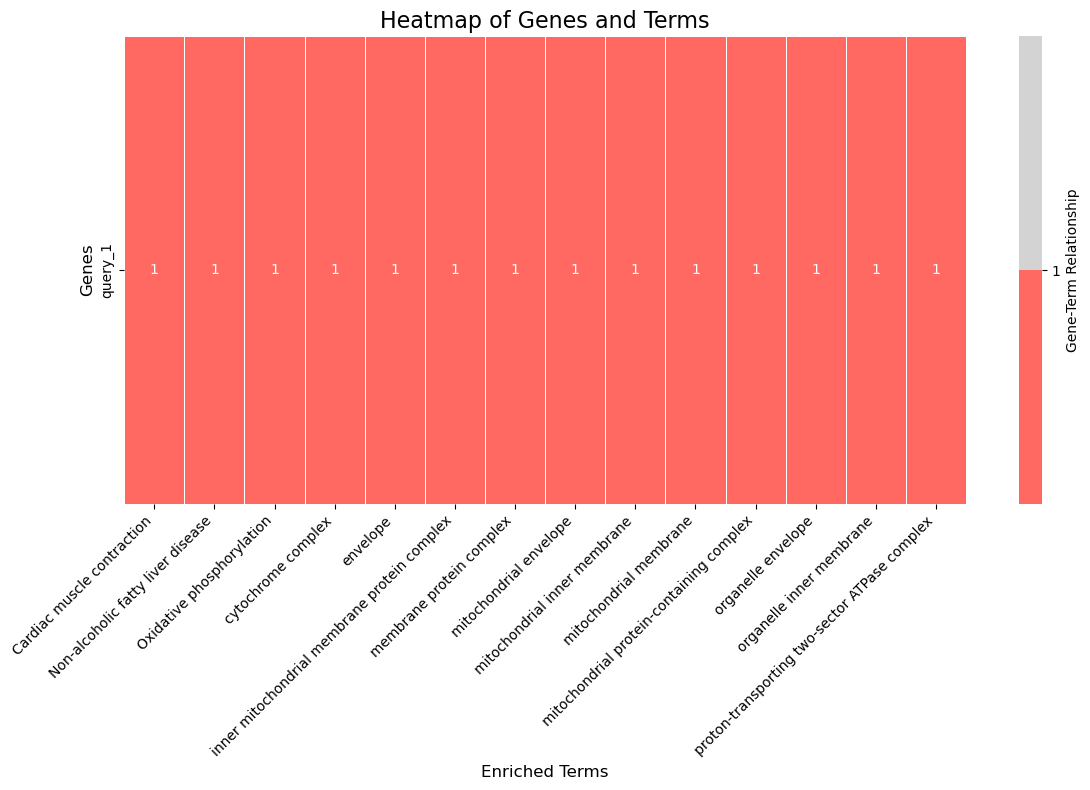

热图已保存为: heatmap_genes_vs_terms.png


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_heatmap(matched_genes_table, output_file="heatmap_genes_vs_terms.png"):
    """
    Generate a heatmap showing the relationship between genes and terms.
    :param matched_genes_table: DataFrame containing terms and matched gene lists
    :param output_file: Path to save the output heatmap image
    """
    # Split the matched genes list into a matrix
    matrix = {}
    for _, row in matched_genes_table.iterrows():
        term_name = row["Term Name"]
        genes = row["Matched Genes"].split(", ") if isinstance(row["Matched Genes"], str) else []
        for gene in genes:
            if gene not in matrix:
                matrix[gene] = {}
            matrix[gene][term_name] = 1

    # Convert to DataFrame, fill missing values with 0
    matrix_df = pd.DataFrame(matrix).T.fillna(0).astype(int)

    # Create the heatmap
    plt.figure(figsize=(12, 8))

    # Custom color map
    cmap = ListedColormap(["#ff6961", "#d3d3d3"])  # Gray for 0, red for 1

    # Draw the heatmap
    sns.heatmap(
        matrix_df,
        cmap=cmap,
        cbar_kws={
            "ticks": [0, 1],  # Set colorbar ticks to 0 and 1
            "orientation": "vertical",  # Vertical colorbar
            "label": "Gene-Term Relationship"  # Colorbar label
        },
        linewidths=0.5,
        linecolor="white",
        annot=True,  # Display values in each cell
        fmt="d"  # Display as integers
    )
    plt.title("Heatmap of Genes and Terms", fontsize=16)
    plt.ylabel("Genes", fontsize=12)
    plt.xlabel("Enriched Terms", fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    print(f"Heatmap has been saved as: {output_file}")

# Main program
if __name__ == "__main__":
    # Load the matched genes list
    matched_genes_file = "..Matched_genes_list.xlsx"  # Replace with actual path
    matched_genes_table = pd.read_excel(matched_genes_file)

    # Generate the heatmap
    generate_heatmap(matched_genes_table)
